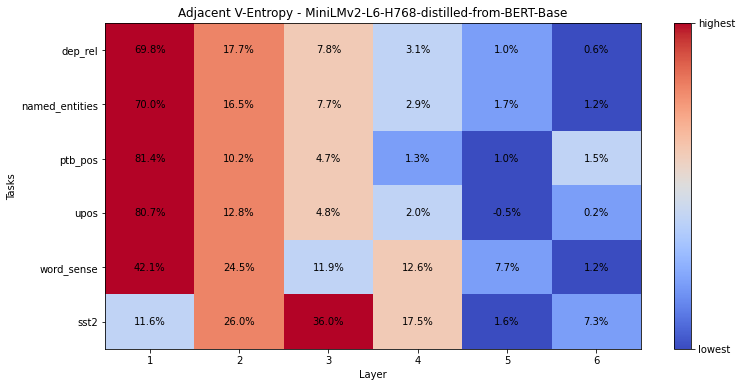

<Figure size 432x288 with 0 Axes>

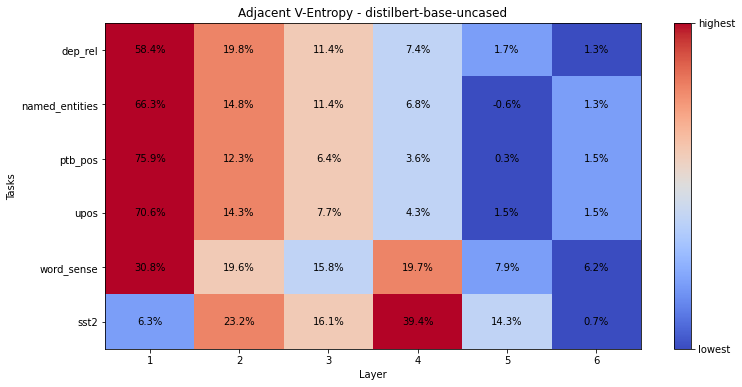

<Figure size 432x288 with 0 Axes>

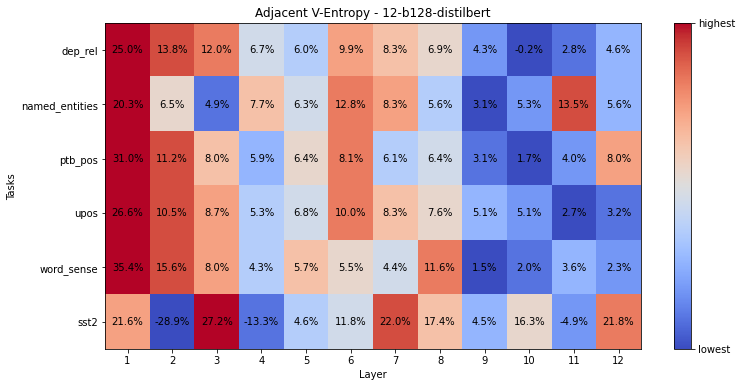

<Figure size 432x288 with 0 Axes>

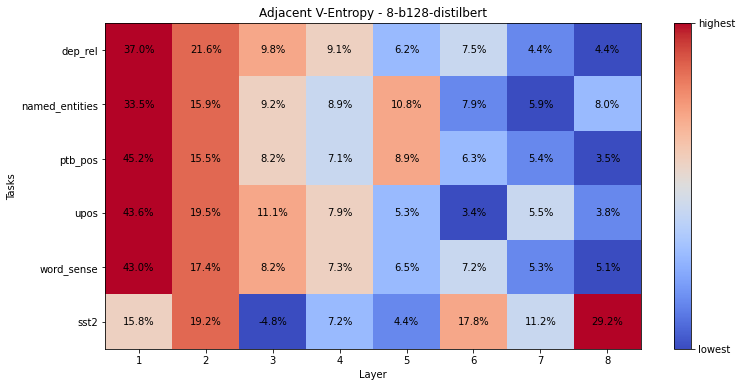

<Figure size 432x288 with 0 Axes>

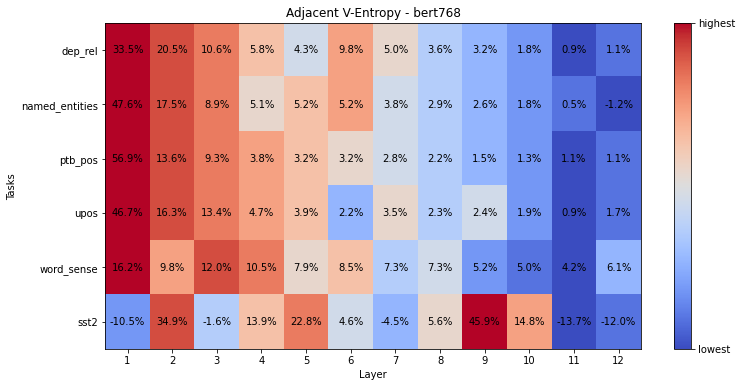

<Figure size 432x288 with 0 Axes>

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedFormatter

#between -1 and 1
def normalise(data):
    return 2*(data - np.min(data)) / (np.max(data) - np.min(data))-1

def get_data(task,model_name,layer_number):
    single_layers = ['reports/{}-{}-layer{}.yaml.results/dev.v_entropy'.format(task,model_name,i) for i in range(0,layer_number)] #(0-5)
    two_layers = ['reports/{}-{}-layer{}-{}.yaml.results/dev.v_entropy'.format(task,model_name,i,i+1) for i in range(0,layer_number)] #(0-1),(1,2)
    base = []
    cond = []
    for file_path in single_layers:
        if os.path.isfile(file_path):
            with open(file_path, "r") as f:
                base.append(float(f.read().strip()))
        else:
            print("Path Invalid")

    for two_layer_file_path in two_layers:
        if os.path.isfile(two_layer_file_path):
            with open(two_layer_file_path, "r") as f:
                cond.append(float(f.read().strip()))
        else:
            print("Path Invalid")
    r = [(b-c) for b, c in zip(base, cond)]
    return r

tasks=["dep_rel","named_entities","ptb_pos","upos","word_sense","sst2"]
models=["MiniLMv2-L6-H768-distilled-from-BERT-Base","distilbert-base-uncased","12-b128-distilbert","8-b128-distilbert","bert768"]
layer_numbers=[6,6,12,8,12]


for count, model in enumerate(models):
    results = np.empty((0,layer_numbers[count]))
    for task in tasks:
        r = get_data(task, model,layer_numbers[count])
        results = np.append(results, [r], axis=0)
    x_indices = range(1, layer_numbers[count] + 1)
    plt.figure(figsize=(12,6))
    plt.title("Adjacent V-Entropy - "+model)

    b = np.argsort(np.argsort(results, axis=1), axis=1)
    im = plt.imshow(b, aspect="auto", cmap="coolwarm")
    plt.colorbar(im, ticks=np.array([0.0, 1.0])*b.max(), 
                format=FixedFormatter(["lowest", "highest"]))


    percentages = results.T/results.T.sum(axis=0) * 100 

    for i in range(results.shape[0]):
        for j in range(results.shape[1]):
            #plt.text(j,i,format(results[i,j], '.4f'), ha="center", va="center",)
            plt.text(j,i,format(percentages.T[i,j], '.1f') + "%", ha="center", va="center",)
    
    plt.xlabel('Layer')
    plt.ylabel('Tasks')
    plt.xticks(ticks=range(0,layer_numbers[count]), labels=range(1,layer_numbers[count]+1))
    plt.yticks(ticks=range(0,len(tasks)), labels=tasks)
    # plt.savefig('graphs/Adjacent-Heatmap/Adjacent heatmap non percent {}.jpg'.format(model), dpi=200)
    # plt.savefig('graphs/Adjacent-Heatmap/Adjacent heatmap non percent {}.svg'.format(model), dpi=200)
    plt.savefig('graphs/Adjacent-Heatmap/Adjacent heatmap {}.jpg'.format(model), dpi=200)
    plt.savefig('graphs/Adjacent-Heatmap/Adjacent heatmap {}.svg'.format(model), dpi=200)
    plt.show()
    plt.clf()
